In [1]:
include("core.jl")
using Plots

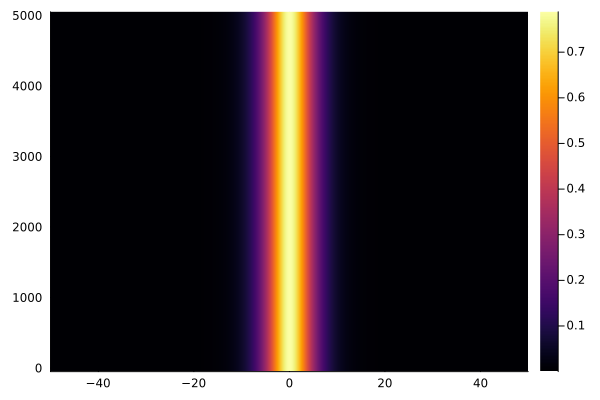

In [2]:
T = 100e-12
N = 2^13
ν = 1/T
t = T*(-N÷2:N÷2-1)/N
L = 5e3
λ = 1.55e-6
#fib = Material(L, 0*0.046e-3, [0.0,  -2.1682619391414893e-26, 0.0], 1.1e-3, λ)
fib = smf28(L,λ)
fib.α = 0
τ = 5e-12
n = 1.0
P = abs((fib.β[2] / fib.γ / τ^2) * n.^2) # Soliton power
u0  = sqrt(P) * sech.((t) ./ τ) .|> ComplexF64 # Soliton formula



prob = NLSEProblem(t, u0, fib)

z, A = solve(prob, 1.0, n_saves = 50, tol=1e-3)


heatmap(t*1e12,z, abs2.(A))


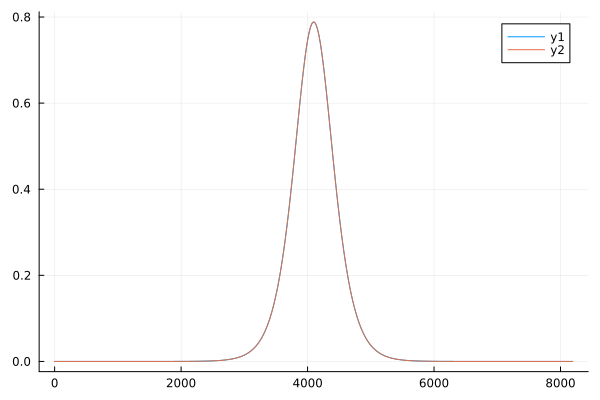

In [3]:
plot(abs2.(A[end,:]))
plot!(abs2.(u0))

In [4]:
plot(abs2.(A[:,end]))
plot!(abs2.(A[:,1]))
norm2(x) = x./maximum(x)
plot(100*norm2(real.(fftshift(ifft(abs2.(fft(abs2.(A[:,end].*(1.0)))))[2:end]))))

UndefVarError: UndefVarError: `A` not defined

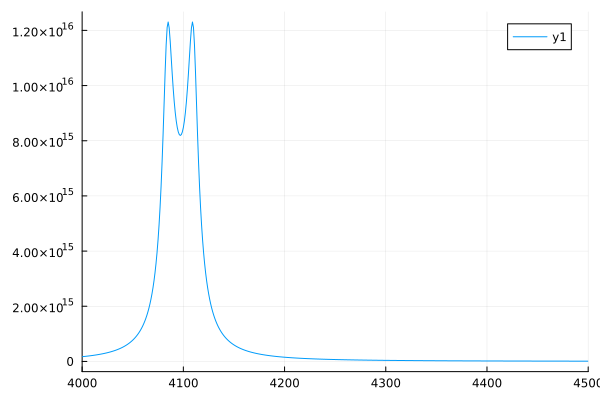

In [26]:
plot(fftshift(fft(hr(fib,t*1e-2))).|> abs, xlims=(4000,4500))